In [598]:
import numpy as np
from numpy import ndarray

from typing import Callable, Dict, Tuple, List

np.set_printoptions(precision=4)
# GRAPHS_IMG_FILEPATH = "/Users/seth/development/01_deep-learning-from-scratch/images/02_fundamentals/graphs/"

In [599]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [600]:
TEST_ALL = False

# Boston data

In [601]:
import pandas as pd

In [602]:
# from sklearn.datasets import load_boston
boston = pd.read_csv("boston.csv", index_col=[0])

In [603]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [604]:
data = boston.drop(columns="Price").values
target = boston.Price.values
features = boston.columns.values

# SciKit Learn Linear Regression

## Data prep

In [605]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
data = s.fit_transform(data)

In [606]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=80718)

y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

## Regression

In [607]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [608]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

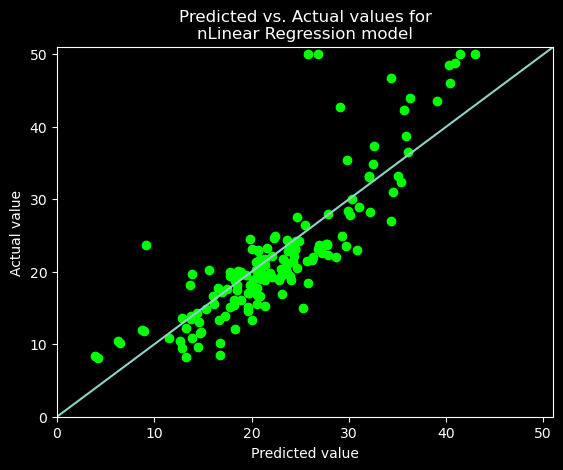

In [609]:
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\nnLinear Regression model")
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test, color="lime")
plt.plot([0, 51], [0, 51]);
# plt.savefig(IMG_FILEPATH + "00_linear_real_pred_vs_actual.png");

## Testing changing feature

In [610]:
features[12]

'LSTAT'

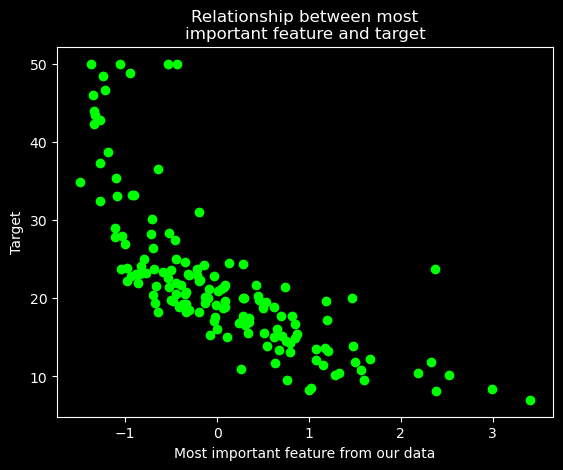

In [611]:
plt.scatter(X_test[:, 12], y_test, color="lime")
plt.xlabel("Most important feature from our data")
plt.ylabel("Target")
plt.title("Relationship between most\nimportant feature and target");
# plt.savefig(IMG_FILEPATH + "02_most_important_feature_vs_target.png")

Non linear relationship

## Model error

In [612]:
def mae(preds: ndarray, actuals: ndarray):
    '''
    Compute mean absolute error.
    '''
    return np.mean(np.abs(preds - actuals))

def rmse(preds: ndarray, actuals: ndarray):
    '''
    Compute root mean squared error.
    '''
    return np.sqrt(np.mean(np.power(preds - actuals, 2)))

In [613]:
print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: 3.5671 
Root mean squared error: 5.0476


In [614]:
import numpy as np
np.round(lr.coef_, 2)

array([[-1.01,  0.71,  0.28,  0.71, -2.21,  2.38,  0.71, -2.66,  2.63,
        -1.82, -2.33,  0.85, -4.19]])

In [617]:
np.round(y_test.mean(), 4)

22.0776

In [618]:
np.round(rmse(preds, y_test) / y_test.mean(), 4)

0.2286

RMSE is 23% on average of y.

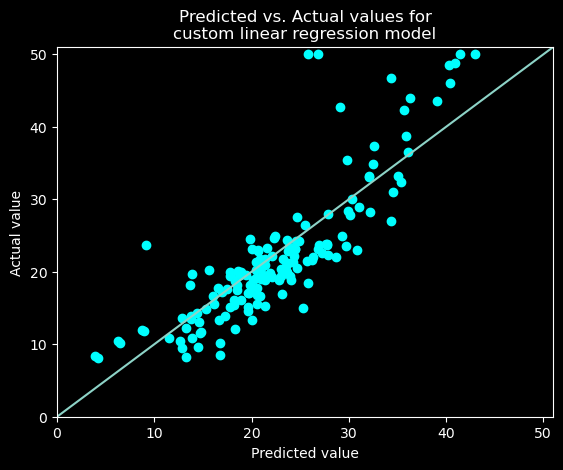

In [619]:
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\ncustom linear regression model");
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test, color="aqua")
plt.plot([0, 51], [0, 51]);
# plt.savefig(GRAPHS_IMG_FILEPATH + "01_linear_custom_pred_vs_actual.png");

:::

In [636]:
params, losses = train(X_train, y_train, 23, 50, 0.001)

302.704334963379
291.70068003201493
219.98939490045782
277.0740239984779
206.47499139891733
169.44909752988377
149.84549855422966
140.58803673525424
160.70251350030884
90.26302776828719
145.97274991940753
74.81317729325063
82.17458038083811
106.47852347245065
121.4900888748998
86.66275708292001
88.14657823466804
56.176255686453935
43.89225885643503
32.34083551497987
49.660535872340944
77.6996043719352
34.258222499618164
86.74769373374609
30.03242510132136
47.488635521805286
51.331991473386225
30.35839344272022
39.36397752951558
21.432958491948387
17.29100056840118
20.282017797229496
20.472632449698555
22.52157409906243
25.2442006832334
40.25303870736292
22.395306228075558
10.131157213273804
8.143770606601107
33.10215065614598
25.51439406885695
26.10160108172844
8.809508333603135
19.64490361996149
11.099093686058765
14.547185881793837
18.437306260966096
5.800202909088876
17.789036695843013
31.353687206498602


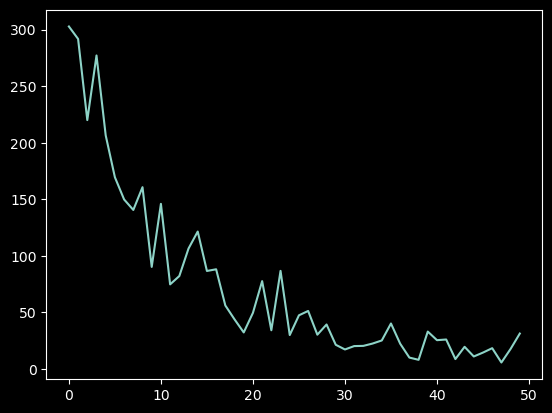

In [637]:
plt.plot(losses);

In [638]:
a = preds

In [639]:
preds = np.dot(X_test, params["W"]) + params["b"]

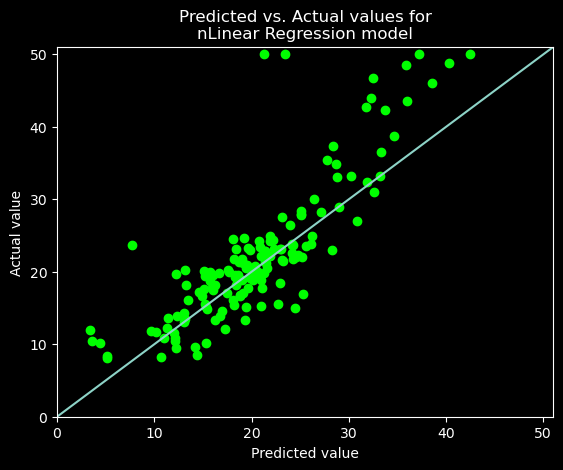

In [640]:
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\nnLinear Regression model")
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test, color="lime")
plt.plot([0, 51], [0, 51]);
# plt.savefig(IMG_FILEPATH + "00_linear_real_pred_vs_actual.png");

In [641]:
print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: 3.6134 
Root mean squared error: 5.5116


In [642]:
import numpy as np
np.round(lr.coef_, 2)

array([[-1.01,  0.71,  0.28,  0.71, -2.21,  2.38,  0.71, -2.66,  2.63,
        -1.82, -2.33,  0.85, -4.19]])

In [643]:
np.round(y_test.mean(), 4)

22.0776

In [644]:
np.round(rmse(preds, y_test) / y_test.mean(), 4)

0.2496

In [645]:
import numpy as np
np.round(lr.coef_, 2)

array([[-1.01,  0.71,  0.28,  0.71, -2.21,  2.38,  0.71, -2.66,  2.63,
        -1.82, -2.33,  0.85, -4.19]])

In [646]:
params["W"][:,0]

array([-0.7982,  0.1313, -0.2139,  1.0188, -0.2864,  3.6748,  0.3874,
       -1.0536,  0.6046, -0.2257, -1.7999,  0.9322, -3.0607])

In [647]:
np.round(y_test.mean(), 4)

22.0776

In [633]:
np.round(rmse(preds, y_test) / y_test.mean(), 4)

0.2323

_____

In [1]:
import numpy as np

In [241]:
def sigmoid(x):
    
    return 1/(1+np.exp(-x))

In [242]:
def forward(X, params):
    
    return np.dot(X, params["W"]) + params["b"]

In [307]:
def backward(X, Y, params):
    
    M = np.dot(X, params["W"])
    P = M + params["b"]
    L = 1/2*(np.power(Y-P, 2))
    
    
    dL_dP = -2*(Y-P)
    dP_dM, dP_db = np.ones_like(M), np.ones_like(params["b"])
    dM_dW = np.transpose(X, (1,0))
    
    # print(dL_dP.shape, dP_dM.shape, dM_dW.shape)
    
    
    dL_dW = np.dot(dM_dW, (dL_dP*dP_dM))
    dL_db = (dL_dP*dP_db).sum(axis=0)
    
    gradients = {}
    gradients["W"] = dL_dW
    gradients["b"] = dL_db
    
    return gradients
    

In [308]:
def generate_batch(X, Y, start, size):
    
    if start+size > X.shape[0]:
        size = X.shape[0] - start
        
    return X[start:start+size], Y[start:start+size]

In [309]:
def permute_data(X, Y):

    perm = np.random.permutation(X.shape[0])
    return X[perm], Y[perm]

In [552]:
def train(X, Y, batch_size, epochs, learning_rate):
    
    losses = []
    
    params = {}
    params["W"] = np.random.rand(X.shape[1],1)
    params["b"] = np.random.rand(1,1)
    
    start = 0
    
    for i in range(epochs):
        
        if start >= X.shape[0]:
            X, Y = permute_data(X, Y)
            start = 0
        
        X_batch, Y_batch = generate_batch(X, Y, start, batch_size)
        start+=batch_size
        
        P = forward(X_batch, params)
        loss = 1/2*(np.power(Y_batch-P, 2))
    
        gradients = backward(X_batch, Y_batch, params)
        # print(gradients)
        print(loss.mean())
        losses.append(loss.mean())
        
        for param in params.keys():
            
            params[param] -= learning_rate*gradients[param]
        
        
    return params, losses

In [272]:
X, Y = np.random.rand(10,3), np.random.rand(10,1)

In [273]:
train(X, Y)

0.3981405852203045
0.3861672375495667
0.37458570970469945
0.36338316456205677
0.3525471856289095
0.3420657632605583
0.3319272813290732
0.32212050432886224
0.3126345649047553
0.30345895178875554
0.29458349813207346
0.2859983702194841
0.2776940565534865
0.2696613572961427
0.26189137405687946
0.254375500014915
0.24710541036534614
0.24007305307829102
0.23327063996082814
0.22669063801181238
0.2203257610599676
0.2141689616759775
0.20821342334959342
0.20245255292307734
0.1968799732725798
0.19148951622932792
0.18627521573276767
0.18123130120805747
0.17635219116056347
0.17163248698024508
0.16706696694905396
0.1626505804446931
0.1583784423343034
0.1542458275518531
0.1502481658532108
0.14638103674308067
0.14264016456816747
0.13902141377112495
0.13552078430001915
0.1321344071682109
0.12885854015972828
0.12568956367536227
0.12262397671487442
0.11965839299085576
0.11678953716992446
0.11401424123708839
0.11132944097923765
0.10873217258386295
0.10621956934922494
0.10378885850232171
0.10143735812112262

({'W': array([[ 0.7826737 ],
         [ 0.75878651],
         [-0.0059184 ]]),
  'b': array([[-0.149303]])},
 [0.3981405852203045,
  0.3861672375495667,
  0.37458570970469945,
  0.36338316456205677,
  0.3525471856289095,
  0.3420657632605583,
  0.3319272813290732,
  0.32212050432886224,
  0.3126345649047553,
  0.30345895178875554,
  0.29458349813207346,
  0.2859983702194841,
  0.2776940565534865,
  0.2696613572961427,
  0.26189137405687946,
  0.254375500014915,
  0.24710541036534614,
  0.24007305307829102,
  0.23327063996082814,
  0.22669063801181238,
  0.2203257610599676,
  0.2141689616759775,
  0.20821342334959342,
  0.20245255292307734,
  0.1968799732725798,
  0.19148951622932792,
  0.18627521573276767,
  0.18123130120805747,
  0.17635219116056347,
  0.17163248698024508,
  0.16706696694905396,
  0.1626505804446931,
  0.1583784423343034,
  0.1542458275518531,
  0.1502481658532108,
  0.14638103674308067,
  0.14264016456816747,
  0.13902141377112495,
  0.13552078430001915,
  0.13213440

In [274]:
import pandas as pd

In [526]:
data = pd.read_csv("boston.csv", index_col=[0])

In [527]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [528]:
from sklearn.preprocessing import StandardScaler

In [529]:
X = data.iloc[:,:13].values
Y = data.iloc[:,12].values.reshape(-1,1)

In [530]:
sc_X, sc_Y = StandardScaler().fit(X), StandardScaler().fit(Y) 

In [531]:
X,Y = sc_X.transform(X), sc_Y.transform(Y)

In [606]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=80718)

y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

In [475]:
params, losses = train(X_train,y_train, 23, 100, 0.001)

0.7853015127512112
0.3331081286288436
0.7590798757793948
0.5549544516152989
0.725319960815758
0.9472670198181308
0.4885943477737022
0.18721663888935727
0.34282212229134157
1.5869860240807023
0.25607615771758324
0.5905811397402175
0.2294708866791339
0.33432582778129294
0.21503180960235496
0.5502862529311519
0.14943915020655862
0.21174439023221672
0.2653387849823462
0.129278580119579
0.1304089475504537
0.1519280903146873
0.10524861929372253
0.2733285032342788
0.10522202204013587
0.15602929927766618
0.12150544353810937
0.16657282151372904
0.2149569565996019
0.5285044868929456
0.10186436173535708
0.3104733441376044
0.09270816410706181
0.1597447840102943
0.07744597253413091
0.29523228708454696
0.06645784881234952
0.04016767491198579
0.08867236760262685
0.10917228589831805
0.06956561419829244
0.09540602058153409
0.10162948405480682
0.08429641719170923
0.04348530513335964
0.02809844305868509
0.02959521703411033
0.0494286140279974
0.050455755151301115
0.0723810714590043
0.03043624070795593
0.1

In [476]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

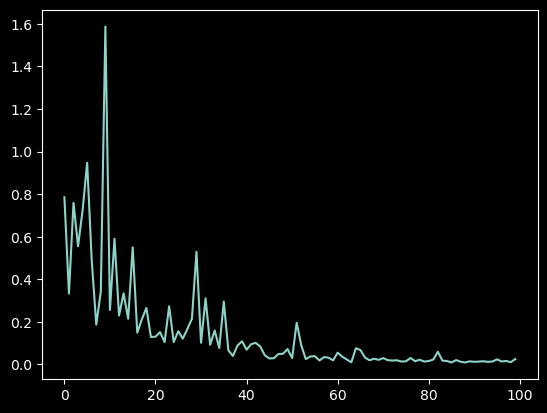

In [477]:
plt.plot(losses);

In [478]:
from numpy import ndarray

In [479]:
def mae(preds: ndarray, actuals: ndarray):
    '''
    Compute mean absolute error.
    '''
    return np.mean(np.abs(preds - actuals))

def rmse(preds: ndarray, actuals: ndarray):
    '''
    Compute root mean squared error.
    '''
    return np.sqrt(np.mean(np.power(preds - actuals, 2)))

In [480]:
preds = forward(X_test, params)

In [481]:
print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: 0.1396 
Root mean squared error: 0.1722


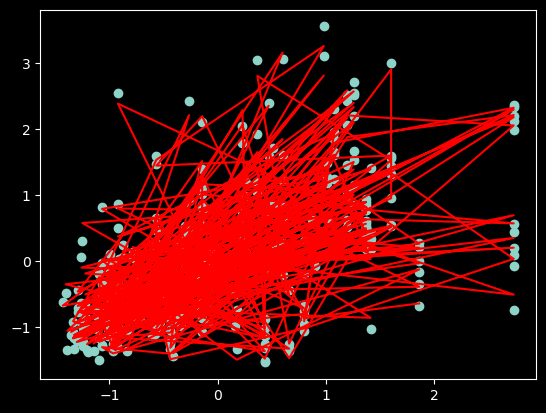

In [482]:
plt.scatter(X_train[:,4], y_train);
plt.plot(X_train[:,4], predict(X_train,params), color="red");

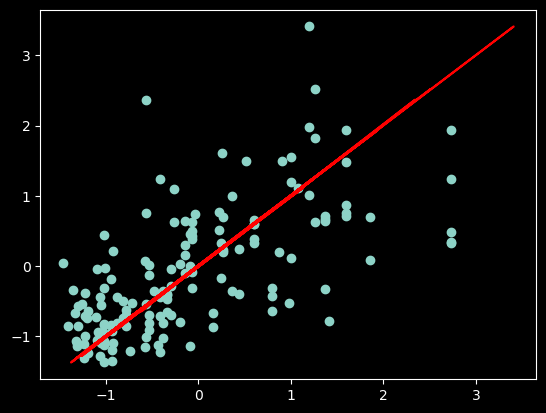

In [474]:
plt.scatter(X_test[:,4], y_test);
plt.plot(preds, y_test, color="red");

In [454]:
def predict(X, params):
    
    return np.dot(X, params["W"]) + params["b"]
    

In [455]:
predict(X, params)

array([[-1.09268608],
       [-0.48733272],
       [-1.20585931],
       [-1.35873918],
       [-1.02417071],
       [-1.03823935],
       [-0.02777562],
       [ 0.91524606],
       [ 2.42368823],
       [ 0.62927069],
       [ 1.09681329],
       [ 0.09306907],
       [ 0.42703603],
       [-0.61560516],
       [-0.33426529],
       [-0.5870442 ],
       [-0.85504085],
       [ 0.28141869],
       [-0.14061505],
       [-0.19392962],
       [ 1.17089362],
       [ 0.16461352],
       [ 0.84750003],
       [ 1.01189145],
       [ 0.51128687],
       [ 0.5401498 ],
       [ 0.30345607],
       [ 0.64679641],
       [ 0.02070972],
       [-0.09582659],
       [ 1.39153707],
       [ 0.05548225],
       [ 2.10203935],
       [ 0.79697372],
       [ 1.07339662],
       [-0.41450715],
       [-0.17347208],
       [-0.54367804],
       [-0.35568189],
       [-1.15831967],
       [-1.48729957],
       [-1.09261574],
       [-0.95484756],
       [-0.72719737],
       [-0.42766695],
       [-0

In [620]:
NUM = 40
a = np.repeat(X_test[:,:-1].mean(axis=0, keepdims=True), NUM, axis=0)
b = np.linspace(-1.5, 3.5, NUM).reshape(NUM, 1)

test_feature = np.concatenate([a, b], axis=1)
test_preds = predict(test_feature, weights)[:, 0]

In [438]:
test_preds

array([-1.37018758, -1.25151765, -1.13284773, -1.01417781, -0.89550788,
       -0.77683796, -0.65816804, -0.53949811, -0.42082819, -0.30215826,
       -0.18348834, -0.06481842,  0.05385151,  0.17252143,  0.29119135,
        0.40986128,  0.5285312 ,  0.64720113,  0.76587105,  0.88454097,
        1.0032109 ,  1.12188082,  1.24055074,  1.35922067,  1.47789059,
        1.59656052,  1.71523044,  1.83390036,  1.95257029,  2.07124021,
        2.18991013,  2.30858006,  2.42724998,  2.54591991,  2.66458983,
        2.78325975,  2.90192968,  3.0205996 ,  3.13926952,  3.25793945])

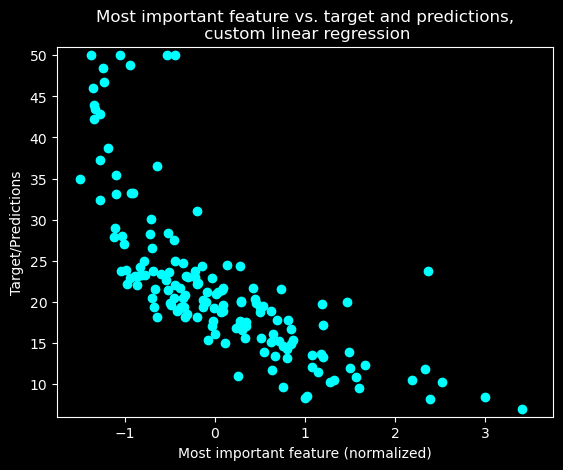

In [621]:
plt.scatter(X_test[:, 12], y_test, color="aqua")
plt.plot(np.array(test_feature[:, -1]), test_preds, linewidth=2, c='orange')
plt.ylim([6, 51])
plt.xlabel("Most important feature (normalized)")
plt.ylabel("Target/Predictions")
plt.title("Most important feature vs. target and predictions,\n custom linear regression");
# plt.savefig(GRAPHS_IMG_FILEPATH + "03_most_important_feature_vs_predictions.png")

In [393]:
params

{'W': array([[ 0.10174518],
        [-0.01957737],
        [ 0.21479438],
        [-0.004355  ],
        [-0.04537869],
        [ 0.04353089],
        [ 0.29431278],
        [ 0.37134026],
        [ 0.04108359],
        [-0.08510555],
        [-0.0280174 ],
        [ 0.04454247],
        [ 0.92562541]]),
 'b': array([[0.01551415]])}

In [394]:
predict(X=X[100,:], params=params)

array([[-0.55732495]])

In [395]:
Y[100]

array([-0.45319071])

In [396]:
print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: 0.1801 
Root mean squared error: 0.2525


In [617]:
np.round(y_test.mean(), 4)

22.0776

In [618]:
np.round(rmse(preds, y_test) / y_test.mean(), 4)

0.2286

In [441]:
preds = predict(X_test, params)

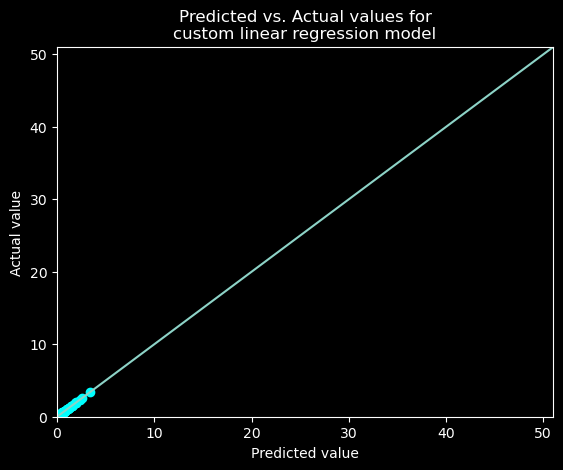

In [442]:
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\ncustom linear regression model");
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test, color="aqua")
plt.plot([0, 51], [0, 51]);
# plt.savefig(GRAPHS_IMG_FILEPATH + "01_linear_custom_pred_vs_actual.png");

In [443]:
NUM = 40
a = np.repeat(X_test[:,:-1].mean(axis=0, keepdims=True), NUM, axis=0)
b = np.linspace(-1.5, 3.5, NUM).reshape(NUM, 1)

test_feature = np.concatenate([a, b], axis=1)
test_preds = predict(test_feature, params)[:, 0]

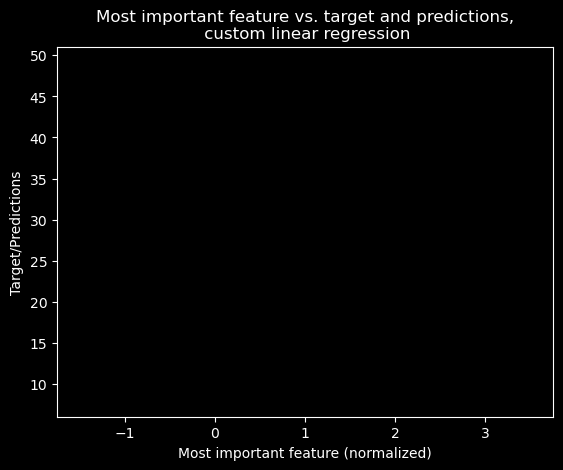

In [445]:
plt.scatter(X_test[:, 12], y_test, color="aqua")
plt.plot(np.array(test_feature[:, -1]), test_preds, linewidth=2, c='orange')
plt.ylim([6, 51])
plt.xlabel("Most important feature (normalized)")
plt.ylabel("Target/Predictions")
plt.title("Most important feature vs. target and predictions,\n custom linear regression");
# plt.savefig(GRAPHS_IMG_FILEPATH + "03_most_important_feature_vs_predictions.png")

_______

## Regression

In [495]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [486]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

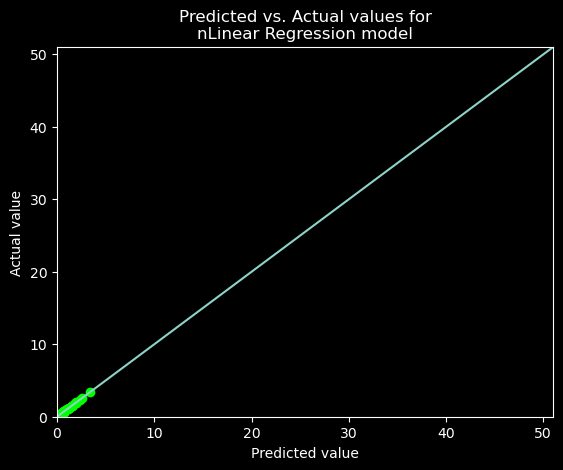

In [487]:
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\nnLinear Regression model")
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test, color="lime")
plt.plot([0, 51], [0, 51]);
# plt.savefig(IMG_FILEPATH + "00_linear_real_pred_vs_actual.png");

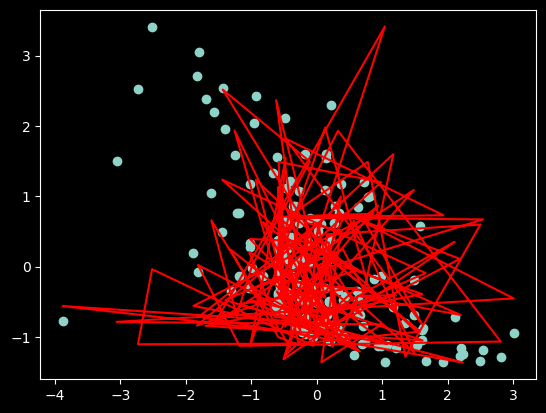

In [534]:
plt.scatter(X_test[:,5], y_test);
plt.plot(X_test[:,5], preds, color="red");

## Testing changing feature

In [497]:
features[12]

NameError: name 'features' is not defined

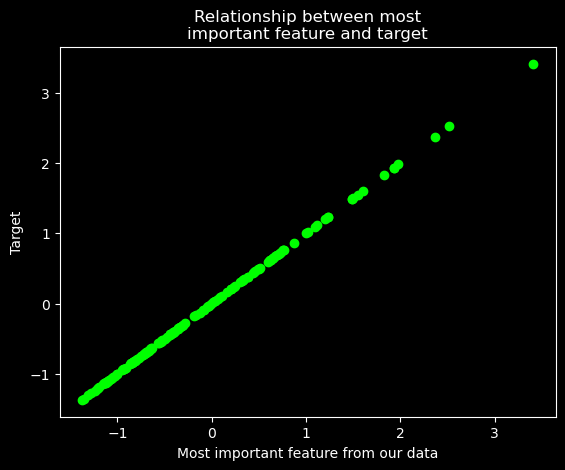

In [498]:
plt.scatter(X_test[:, 12], y_test, color="lime")
plt.xlabel("Most important feature from our data")
plt.ylabel("Target")
plt.title("Relationship between most\nimportant feature and target");
# plt.savefig(IMG_FILEPATH + "02_most_important_feature_vs_target.png")

Non linear relationship

## Model error

In [499]:
def mae(preds: ndarray, actuals: ndarray):
    '''
    Compute mean absolute error.
    '''
    return np.mean(np.abs(preds - actuals))

def rmse(preds: ndarray, actuals: ndarray):
    '''
    Compute root mean squared error.
    '''
    return np.sqrt(np.mean(np.power(preds - actuals, 2)))

In [500]:
print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: 0.0 
Root mean squared error: 0.0


In [501]:
import numpy as np
np.round(lr.coef_, 2)

array([[-0., -0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0.,  1.]])

## Manual linear regression

In [506]:
from typing import Dict, Tuple

In [507]:
def forward_linear_regression(X_batch: ndarray,
                              y_batch: ndarray,
                              weights: Dict[str, ndarray]
                              )-> Tuple[float, Dict[str, ndarray]]:
    '''
    Forward pass for the step-by-step linear regression.
    '''
    # assert batch sizes of X and y are equal
    assert X_batch.shape[0] == y_batch.shape[0]

    # assert that matrix multiplication can work
    assert X_batch.shape[1] == weights['W'].shape[0]

    # assert that B is simply a 1x1 ndarray
    assert weights['B'].shape[0] == weights['B'].shape[1] == 1

    # compute the operations on the forward pass
    N = np.dot(X_batch, weights['W'])

    P = N + weights['B']

    loss = np.mean(np.power(y_batch - P, 2))

    # save the information computed on the forward pass
    forward_info: Dict[str, ndarray] = {}
    forward_info['X'] = X_batch
    forward_info['N'] = N
    forward_info['P'] = P
    forward_info['y'] = y_batch

    return loss, forward_info

In [508]:
def to_2d_np(a: ndarray, 
             type: str = "col") -> ndarray:
    '''
    Turns a 1D Tensor into 2D
    '''

    assert a.ndim == 1, \
    "Input tensors must be 1 dimensional"
    
    if type == "col":        
        return a.reshape(-1, 1)
    elif type == "row":
        return a.reshape(1, -1)

Reorganizamos de forma aleatoria los datos

In [509]:
def permute_data(X: ndarray, y: ndarray):
    '''
    Permute X and y, using the same permutation, along axis=0
    '''
    perm = np.random.permutation(X.shape[0])
    return X[perm], y[perm]

Esta función nos permitirá almacenar los gradientes

<img src="simple-linear-regression-diagram.png" alt="diagram" width="800" style="display: block; margin: 0 auto;">


In [510]:
def loss_gradients(forward_info: Dict[str, ndarray],
                   weights: Dict[str, ndarray]) -> Dict[str, ndarray]:
    '''
    Compute dLdW and dLdB for the step-by-step linear regression model.
    '''
    batch_size = forward_info['X'].shape[0]

    dLdP = -2 * (forward_info['y'] - forward_info['P']) #derivamos la función de pérdida respecto a la predicción (P)

    dPdN = np.ones_like(forward_info['N']) #después, derivamos la predicción P = N+B respecto a N, siendo una matriz de 1s igual que N (suma)

    dPdB = np.ones_like(weights['B']) #de misma manera, derivamos el intercepto

    dLdN = dLdP * dPdN #aplicamos regla de la cadena, para dL_dP y dP_dN, para saber "cómo cambia la pérdida en términos del producto punto N=X*W"

    dNdW = np.transpose(forward_info['X'], (1, 0)) #para saber ahora cómo cambia dicho producto en términos de W, es tan solo su coeficiente traspuesto

    # need to use matrix multiplication here,
    # with dNdW on the left (see note at the end of last chapter)    
    dLdW = np.dot(dNdW, dLdN)
    #realizamos ahora la derivada de la pérdida en términos de W, realizando el producto punto (dN_dW a la izquierda, y dL_dN a la derecha)

    # need to sum along dimension representing the batch size:
    # see note near the end of the chapter    
    dLdB = (dLdP * dPdB).sum(axis=0)
    #aplicamos la regla de la cadena para el intercepto, cuyos valores de gradiente de las filas son sumados

    loss_gradients: Dict[str, ndarray] = {}
    loss_gradients['W'] = dLdW
    loss_gradients['B'] = dLdB
    

    return loss_gradients

Esta función generará los bloques o "batches" de datos que vamos usando para ajustar secuencialmente el modelo

In [511]:
Batch = Tuple[ndarray, ndarray]

def generate_batch(X: ndarray, 
                   y: ndarray,
                   start: int = 0,
                   batch_size: int = 10) -> Batch:
    '''
    Generate batch from X and y, given a start position
    '''
    assert X.ndim == y.ndim == 2, \
    "X and Y must be 2 dimensional"

    if start+batch_size > X.shape[0]:
        batch_size = X.shape[0] - start
    
    X_batch, y_batch = X[start:start+batch_size], y[start:start+batch_size]
    
    return X_batch, y_batch

In [512]:
def forward_loss(X: ndarray,
                 y: ndarray,
                 weights: Dict[str, ndarray]) -> Tuple[Dict[str, ndarray], float]:
    '''
    Generate predictions and calculate loss for a step-by-step linear regression
    (used mostly during inference).
    '''
    N = np.dot(X, weights['W'])

    P = N + weights['B']

    loss = np.mean(np.power(y - P, 2))

    forward_info: Dict[str, ndarray] = {}
    forward_info['X'] = X
    forward_info['N'] = N
    forward_info['P'] = P
    forward_info['y'] = y

    return forward_info, loss

In [513]:
def init_weights(n_in: int) -> Dict[str, ndarray]:
    '''
    Initialize weights on first forward pass of model.
    '''
    
    weights: Dict[str, ndarray] = {}
    W = np.random.randn(n_in, 1)
    B = np.random.randn(1, 1)
    
    weights['W'] = W
    weights['B'] = B

    return weights

In [514]:
def train(X: ndarray, 
          y: ndarray, 
          n_iter: int = 1000,
          learning_rate: float = 0.01,
          batch_size: int = 100,
          return_losses: bool = False, 
          return_weights: bool = False, 
          seed: int = 1) -> None:
    '''
    Train model for a certain number of epochs.
    '''
    if seed:
        np.random.seed(seed)
    start = 0

    # Initialize weights
    weights = init_weights(X.shape[1])

    # Permute data
    X, y = permute_data(X, y)
    
    if return_losses:
        losses = []

    for i in range(n_iter):

        # Generate batch
        if start >= X.shape[0]:
            X, y = permute_data(X, y)
            start = 0
        
        X_batch, y_batch = generate_batch(X, y, start, batch_size)
        start += batch_size
    
        # Train net using generated batch
        forward_info, loss = forward_loss(X_batch, y_batch, weights)

        if return_losses:
            losses.append(loss)

        loss_grads = loss_gradients(forward_info, weights)
        for key in weights.keys():
            weights[key] -= learning_rate * loss_grads[key]

    if return_weights:
        return losses, weights
    
    return None

In [515]:
train_info = train(X_train, y_train,
                   n_iter = 1000,
                   learning_rate = 0.001,
                   batch_size=23, 
                   return_losses=True, 
                   return_weights=True, 
                   seed=180708)
losses = train_info[0]
weights = train_info[1]

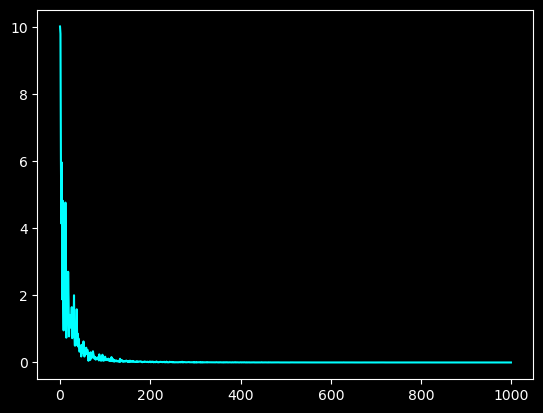

In [516]:
plt.plot(list(range(1000)), losses, color="aqua");

In [517]:
def predict(X: ndarray,
            weights: Dict[str, ndarray]):
    '''
    Generate predictions from the step-by-step linear regression model.
    '''

    N = np.dot(X, weights['W'])

    return N + weights['B']

In [518]:
preds = predict(X_test, weights)

In [519]:
print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: 0.0051 
Root mean squared error: 0.0069


In [520]:
np.round(y_test.mean(), 4)

-0.0815

In [521]:
np.round(rmse(preds, y_test) / y_test.mean(), 4)

-0.0848

RMSE is 23% on average of y.

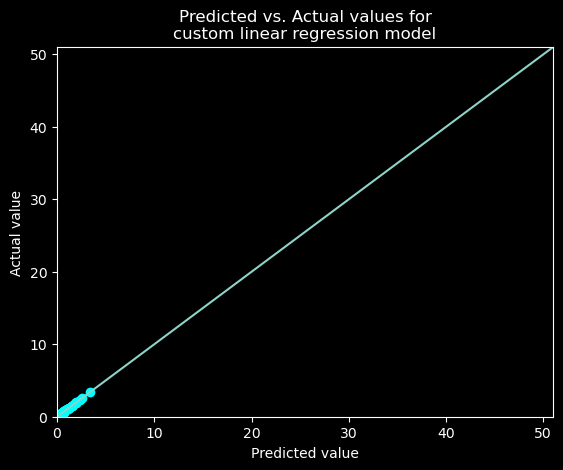

In [522]:
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\ncustom linear regression model");
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test, color="aqua")
plt.plot([0, 51], [0, 51]);
# plt.savefig(GRAPHS_IMG_FILEPATH + "01_linear_custom_pred_vs_actual.png");

In [523]:
NUM = 40
a = np.repeat(X_test[:,:-1].mean(axis=0, keepdims=True), NUM, axis=0)
b = np.linspace(-1.5, 3.5, NUM).reshape(NUM, 1)

test_feature = np.concatenate([a, b], axis=1)
test_preds = predict(test_feature, weights)[:, 0]

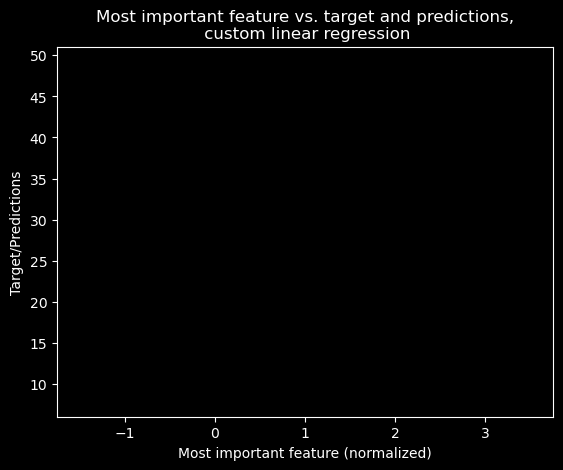

In [524]:
plt.scatter(X_test[:, 12], y_test, color="aqua")
plt.plot(np.array(test_feature[:, -1]), test_preds, linewidth=2, c='orange')
plt.ylim([6, 51])
plt.xlabel("Most important feature (normalized)")
plt.ylabel("Target/Predictions")
plt.title("Most important feature vs. target and predictions,\n custom linear regression");
# plt.savefig(GRAPHS_IMG_FILEPATH + "03_most_important_feature_vs_predictions.png")

## Coefficients

In [525]:
np.round(weights['W'].reshape(-1), 4)

array([ 1.8000e-03, -2.7000e-03, -8.4000e-03,  1.1000e-03,  1.2000e-03,
        1.3000e-03, -1.4000e-03, -1.0000e-03, -1.9300e-02,  2.1900e-02,
        1.0000e-04, -8.0000e-04,  1.0005e+00])